# Keyword detection + analysis in reviews

In [278]:
# Imports
from keywordExtraction import KeyWordExtractor
from os import walk
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from collections import OrderedDict

Fetching all datasets we have --- For now just using one: Edit this later

In [306]:
dataset_dir = "../review_dataset/"

files = []
set_paths = []
categories = {}
for (dirpath, dirnames, filenames) in walk(dataset_dir):
    for file in filenames:
        path_to_set = dirpath + "/" + file
        set_paths.append(path_to_set)
        curr_category = dirpath.split("/")[2]
        if curr_category not in categories:
            categories[curr_category] = [path_to_set]
        else:
            categories[curr_category].append(path_to_set)

print("------ ALL SETS ------")
print(set_paths)
print("\n------ Categorical ------")
for category, paths in categories.items():
    print(category, "-- total:", len(paths))
    print(paths)
print("\n----> TOTAL: ", len(set_paths), "sets")

------ ALL SETS ------
['../review_dataset/Entertainment/amazon-prime-video.csv', '../review_dataset/Entertainment/Netflix.csv', '../review_dataset/Entertainment/ticketmaster-buy-sell-tickets.csv', '../review_dataset/Finance/cash-app.csv', '../review_dataset/Finance/paypal-send-shop-manage.csv', '../review_dataset/Finance/venmo.csv', '../review_dataset/Games/clash-of-clans.csv', '../review_dataset/Games/geometry-dash.csv', '../review_dataset/Games/Minecraft.csv', '../review_dataset/Games/subway-surfers.csv', '../review_dataset/Health/bettersleep-relax-and-sleep.csv', '../review_dataset/Health/planet-fitness-workouts.csv', '../review_dataset/Shopping/Amazon-shopping.csv', '../review_dataset/Shopping/etsy-home-style-gifts.csv', '../review_dataset/Shopping/walmart-shoping-savings.csv', '../review_dataset/Social_Media/facebook.csv', '../review_dataset/Social_Media/tiktok.csv', '../review_dataset/Social_Media/whatsapp-messenger.csv']

------ Categorical ------
Entertainment -- total: 3
['..

In [280]:
current_set = pd.read_csv(set_paths[6]) ## currently just using the first one

## Exploring the set -- and performing EDA + cleaning if any

In [281]:
current_set.head()

,Score,Date,Content,Title
0,5,2022-12-26 02:48:56,I love this game but maybe in the next update ...,Love the game reduce the upgrade times and pos...
1,5,2022-08-21 07:28:50,I hope this reaches the users and the men and ...,Best mobile game ever released
2,5,2023-06-17 10:51:47,"A year ago, lost my job. My life went downhill...",Without exaggeration this game saved my marriage
3,5,2022-08-22 04:50:03,"I love CoC. For many reasons, but the main rea...",Really good!
4,3,2022-09-05 00:02:40,Clash is a wonderful game but it is plagued wi...,Way too expensive and much too long upgrades.


In [282]:
null_mask = current_set.isnull().any(axis=1)
null_rows = current_set[null_mask]
current_set = current_set[null_mask == False]
print("Rows with null values in any col:", len(null_rows))

### We have a clean dataset

Rows with null values in any col: 0


#### Getting summary stats -- and cleaning duplicates

In [283]:
print("TOTAL REVIWS:", current_set.count()["Content"])
print("UNIQUE REVIEWS:", len(current_set["Content"].unique()))
current_set = current_set[current_set["Content"].duplicated() == False]
print(current_set.dtypes)
current_set.head()

TOTAL REVIWS: 10000
UNIQUE REVIEWS: 9920
Score       int64
Date       object
Content    object
Title      object
dtype: object


,Score,Date,Content,Title
0,5,2022-12-26 02:48:56,I love this game but maybe in the next update ...,Love the game reduce the upgrade times and pos...
1,5,2022-08-21 07:28:50,I hope this reaches the users and the men and ...,Best mobile game ever released
2,5,2023-06-17 10:51:47,"A year ago, lost my job. My life went downhill...",Without exaggeration this game saved my marriage
3,5,2022-08-22 04:50:03,"I love CoC. For many reasons, but the main rea...",Really good!
4,3,2022-09-05 00:02:40,Clash is a wonderful game but it is plagued wi...,Way too expensive and much too long upgrades.


#### Cleaning review content + converting to datetime objects

In [284]:
current_set["Content"] = current_set["Content"].str.lower()
current_set["Content"] = current_set["Content"].str.strip()
current_set["Content"] = current_set["Content"].str.replace("’", "'")
current_set['Date'] = pd.to_datetime(current_set['Date'], format='%Y-%m-%d %H:%M:%S')
print("MAX DATE:", current_set['Date'].max())
print("MIN DATE:", current_set['Date'].min())
print(current_set.dtypes)
current_set

MAX DATE: 2023-11-12 02:50:44
MIN DATE: 2017-08-02 14:27:40
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object


,Score,Date,Content,Title
0,5,2022-12-26 02:48:56,i love this game but maybe in the next update ...,Love the game reduce the upgrade times and pos...
1,5,2022-08-21 07:28:50,i hope this reaches the users and the men and ...,Best mobile game ever released
2,5,2023-06-17 10:51:47,"a year ago, lost my job. my life went downhill...",Without exaggeration this game saved my marriage
3,5,2022-08-22 04:50:03,"i love coc. for many reasons, but the main rea...",Really good!
4,3,2022-09-05 00:02:40,clash is a wonderful game but it is plagued wi...,Way too expensive and much too long upgrades.
...,...,...,...,...
9995,5,2021-04-20 06:58:31,this gam is awesome a very good game and if wo...,Really good game just some stuff
9996,4,2021-04-23 23:28:35,in my opinion this game is amazing i am a th9 ...,Blazes review
9997,5,2021-04-17 05:03:01,1-takes skill 2-takes a long time to get high ...,Great game for many reasons
9998,3,2021-04-19 02:55:34,i tried getting my account back on this phone ...,Why


In [285]:
#### one function to clean df
def clean_dataset(df):
    null_mask = df.isnull().any(axis=1)
    null_rows = df[null_mask]
    df = df[null_mask == False]
    print("Rows with null values in any col:", len(null_rows))
    
    print("TOTAL REVIWS:", df.count()["Content"])
    print("UNIQUE REVIEWS:", len(df["Content"].unique()))
    df = df[df["Content"].duplicated() == False]

    df["Content"] = df["Content"].str.lower()
    df["Content"] = df["Content"].str.strip()
    df["Content"] = df["Content"].str.replace("’", "'")
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
    print("MAX DATE:", df['Date'].max())
    print("MIN DATE:", df['Date'].min())
    print("UPDATED DATATYPES:")
    print(df.dtypes)
    
    return df
    

#### Keyword Frequency -- total

In [286]:
########### EXTRACTING KEYWORDS AND COUNTING #############
def getTopKeywords(raw_reviews):
    extractor = KeyWordExtractor("")

    keywords_count = {}
    for review in raw_reviews:
        review = review.strip()
        if not len(review):
            continue
        extractor.setText(review)
        keywords = extractor.yakeExtract()

        for kw, score in keywords:
            if kw in keywords_count:
                keywords_count[kw] += 1
            else:
                keywords_count[kw] = 1
    
    print("...Sorting")
    tuples = zip(keywords_count.keys(), keywords_count.values())
    sorted_by_second = sorted(tuples, reverse=True, key=lambda tup: tup[1])
    return sorted_by_second


### getting keywords and their counts as list of tuples --- DISABLED FOR NOW
# reviews = list(current_set["Content"])
# print("TOTAL REVIEWS:", len(reviews))
# keywords_tuples = getTopKeywords(reviews)
# for kw, count in keywords_tuples:
#     print(kw, count)

In [287]:
# keyword_freq_1gram =  dict((x, y) for x, y in keywords_tuples if " " not in x)
# keyword_freq_2gram = dict((x, y) for x, y in keywords_tuples if " " in x) # phrases
# print(keyword_freq_1gram)
# print()
# print(keyword_freq_2gram)

Run through these, identify interesting terms manually: \
-> for AMAZON
- suspicious
- glitches
- money
- scammed
- customer service
- return
- made in china

#### Checking summary for each data set -- Grouping temporally

----------- READING: ../review_dataset/Entertainment/amazon-prime-video.csv
Rows with null values in any col: 2
TOTAL REVIWS: 9998
UNIQUE REVIEWS: 9990
MAX DATE: 2023-11-12 02:28:30
MIN DATE: 2017-09-14 21:37:15
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    356      356    356
2018-01-01   1876     1876   1876
2019-01-01   1914     1914   1914
2020-01-01   2057     2057   2057
2021-01-01   1481     1481   1481
2022-01-01   1444     1444   1444
2023-01-01    862      862    862


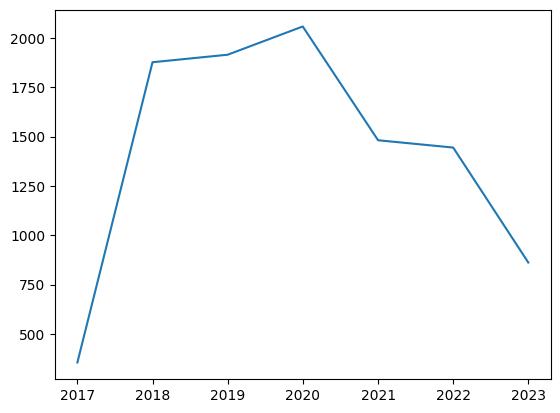

--------------------------
----------- READING: ../review_dataset/Entertainment/Netflix.csv
Failed to read: ../review_dataset/Entertainment/Netflix.csv
----------- READING: ../review_dataset/Entertainment/ticketmaster-buy-sell-tickets.csv
Rows with null values in any col: 1
TOTAL REVIWS: 9999
UNIQUE REVIEWS: 9951
MAX DATE: 2023-11-12 02:04:45
MIN DATE: 2017-09-15 14:14:09
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    277      277    277
2018-01-01   1730     1730   1730
2019-01-01   2327     2327   2327
2020-01-01    656      656    656
2021-01-01   1467     1467   1467
2022-01-01   1873     1873   1873
2023-01-01   1621     1621   1621


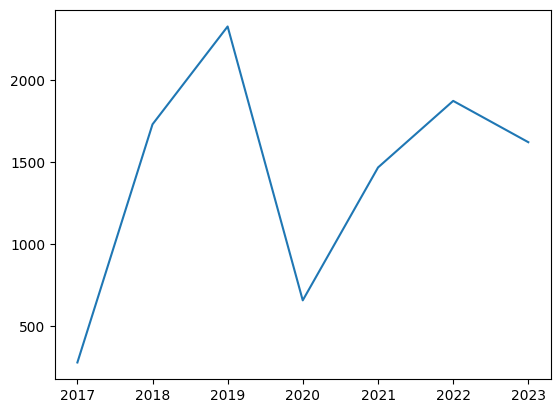

--------------------------
----------- READING: ../review_dataset/Finance/cash-app.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-11 23:56:20
MIN DATE: 2017-09-13 20:59:01
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    150      150    150
2018-01-01   1204     1204   1204
2019-01-01   1518     1518   1518
2020-01-01   2038     2038   2038
2021-01-01   1812     1812   1812
2022-01-01   1696     1696   1696
2023-01-01   1582     1582   1582


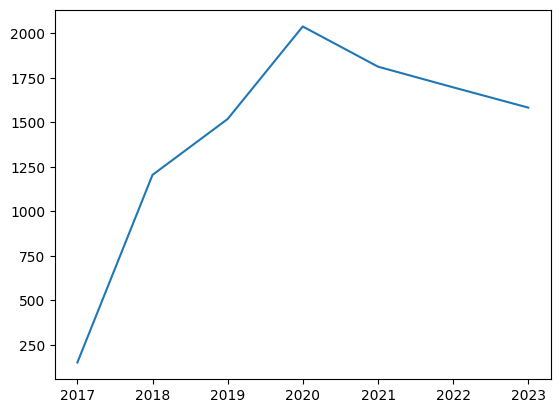

--------------------------
----------- READING: ../review_dataset/Finance/paypal-send-shop-manage.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-11 20:16:03
MIN DATE: 2017-08-25 13:18:09
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    243      243    243
2018-01-01    903      903    903
2019-01-01   1273     1273   1273
2020-01-01   2194     2194   2194
2021-01-01   2036     2036   2036
2022-01-01   1906     1906   1906
2023-01-01   1445     1445   1445


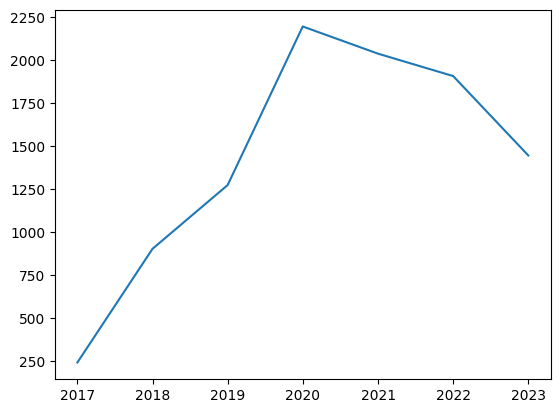

--------------------------
----------- READING: ../review_dataset/Finance/venmo.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-11 15:38:53
MIN DATE: 2017-09-16 05:00:51
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    156      156    156
2018-01-01   1039     1039   1039
2019-01-01   1512     1512   1512
2020-01-01   1752     1752   1752
2021-01-01   2168     2168   2168
2022-01-01   2114     2114   2114
2023-01-01   1259     1259   1259


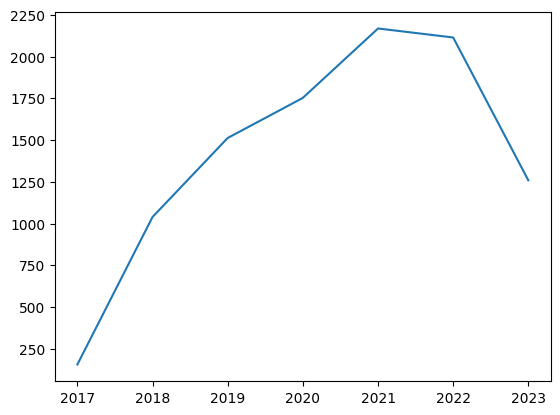

--------------------------
----------- READING: ../review_dataset/Games/clash-of-clans.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 9920
MAX DATE: 2023-11-12 02:50:44
MIN DATE: 2017-08-02 14:27:40
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    650      650    650
2018-01-01   1272     1272   1272
2019-01-01   1938     1938   1938
2020-01-01   2030     2030   2030
2021-01-01   1517     1517   1517
2022-01-01   1438     1438   1438
2023-01-01   1075     1075   1075


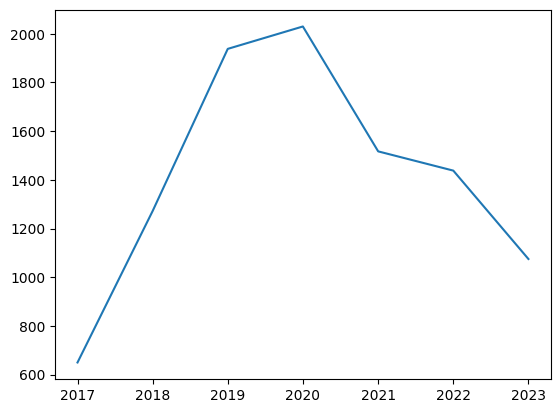

--------------------------
----------- READING: ../review_dataset/Games/geometry-dash.csv
Rows with null values in any col: 2
TOTAL REVIWS: 9998
UNIQUE REVIEWS: 9898
MAX DATE: 2023-11-12 03:16:48
MIN DATE: 2017-01-18 19:23:13
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    760      760    760
2018-01-01    663      663    663
2019-01-01    921      921    921
2020-01-01   1108     1108   1108
2021-01-01   1170     1170   1170
2022-01-01   2648     2648   2648
2023-01-01   2628     2628   2628


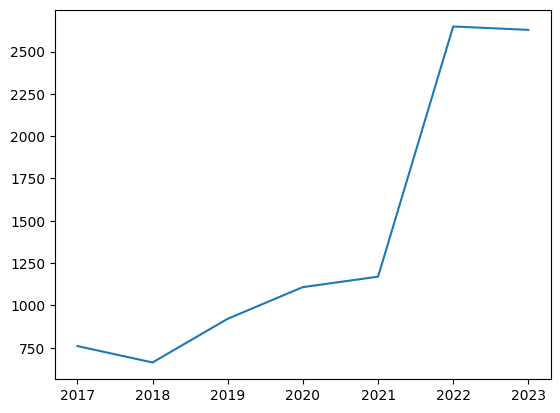

--------------------------
----------- READING: ../review_dataset/Games/Minecraft.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-12 00:17:14
MIN DATE: 2017-09-16 12:31:25
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    436      436    436
2018-01-01   1427     1427   1427
2019-01-01   2201     2201   2201
2020-01-01   2643     2643   2643
2021-01-01   1413     1413   1413
2022-01-01   1058     1058   1058
2023-01-01    822      822    822


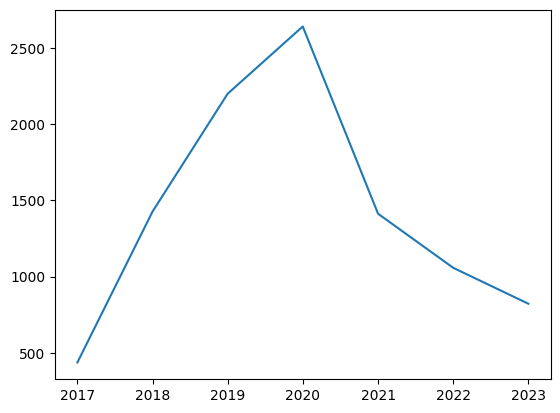

--------------------------
----------- READING: ../review_dataset/Games/subway-surfers.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10020
UNIQUE REVIEWS: 9416
MAX DATE: 2023-11-12 01:46:46
MIN DATE: 2017-08-31 17:08:40
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    138      138    138
2018-01-01    856      856    856
2019-01-01   1023     1023   1023
2020-01-01   1986     1986   1986
2021-01-01   1190     1190   1190
2022-01-01   2738     2738   2738
2023-01-01   1485     1485   1485


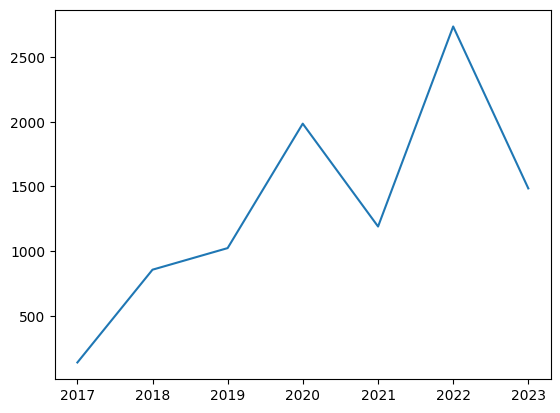

--------------------------
----------- READING: ../review_dataset/Health/bettersleep-relax-and-sleep.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10080
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-12 03:13:50
MIN DATE: 2017-06-06 06:37:19
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01   1135     1135   1135
2018-01-01   4746     4746   4746
2019-01-01    520      520    520
2020-01-01    452      452    452
2021-01-01    789      789    789
2022-01-01   1232     1232   1232
2023-01-01   1126     1126   1126


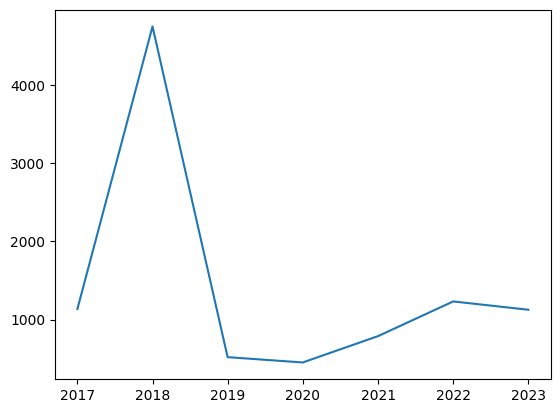

--------------------------
----------- READING: ../review_dataset/Health/planet-fitness-workouts.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10001
UNIQUE REVIEWS: 3149
MAX DATE: 2023-11-12 17:38:18
MIN DATE: 2017-01-01 21:40:08
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    147      147    147
2018-01-01    309      309    309
2019-01-01    901      901    901
2020-01-01    318      318    318
2021-01-01    326      326    326
2022-01-01    634      634    634
2023-01-01    514      514    514


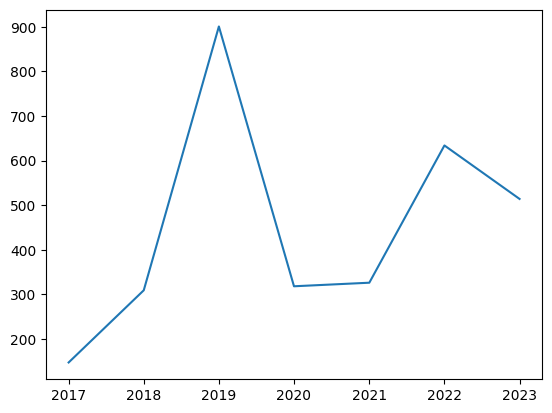

--------------------------
----------- READING: ../review_dataset/Shopping/Amazon-shopping.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10040
UNIQUE REVIEWS: 9559
MAX DATE: 2023-11-12 00:18:42
MIN DATE: 2017-09-07 10:53:53
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    285      285    285
2018-01-01    710      710    710
2019-01-01   1006     1006   1006
2020-01-01   1518     1518   1518
2021-01-01   2817     2817   2817
2022-01-01   1767     1767   1767
2023-01-01   1456     1456   1456


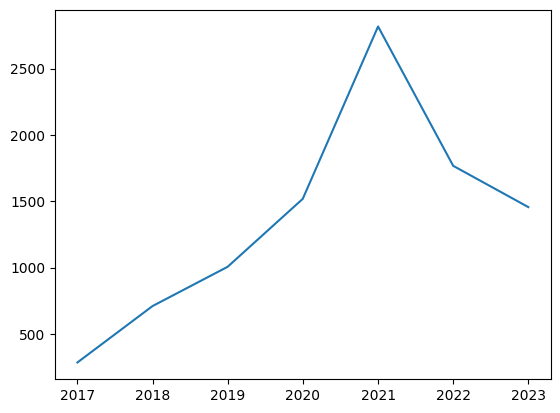

--------------------------
----------- READING: ../review_dataset/Shopping/etsy-home-style-gifts.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-11 23:28:18
MIN DATE: 2017-09-11 21:23:45
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01     72       72     72
2018-01-01    203      203    203
2019-01-01    554      554    554
2020-01-01   1672     1672   1672
2021-01-01   2176     2176   2176
2022-01-01   2602     2602   2602
2023-01-01   2721     2721   2721


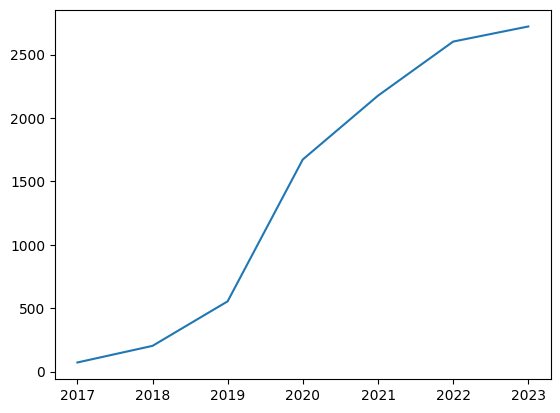

--------------------------
----------- READING: ../review_dataset/Shopping/walmart-shoping-savings.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-11 23:42:53
MIN DATE: 2017-09-12 03:54:52
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01     49       49     49
2018-01-01    597      597    597
2019-01-01    229      229    229
2020-01-01    875      875    875
2021-01-01   4111     4111   4111
2022-01-01   2212     2212   2212
2023-01-01   1927     1927   1927


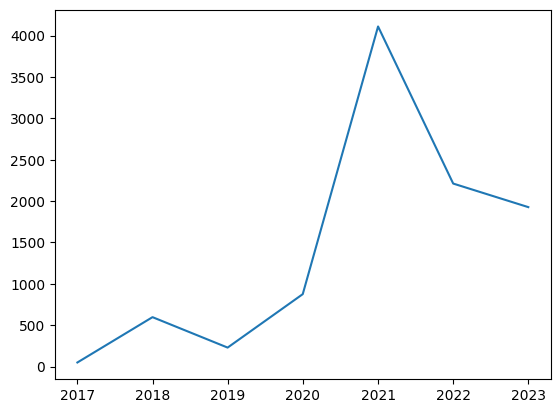

--------------------------
----------- READING: ../review_dataset/Social_Media/facebook.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 9898
MAX DATE: 2023-11-11 16:06:27
MIN DATE: 2017-09-18 00:11:58
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    299      299    299
2018-01-01   1157     1157   1157
2019-01-01   1039     1039   1039
2020-01-01   1708     1708   1708
2021-01-01   2477     2477   2477
2022-01-01   1389     1389   1389
2023-01-01   1829     1829   1829


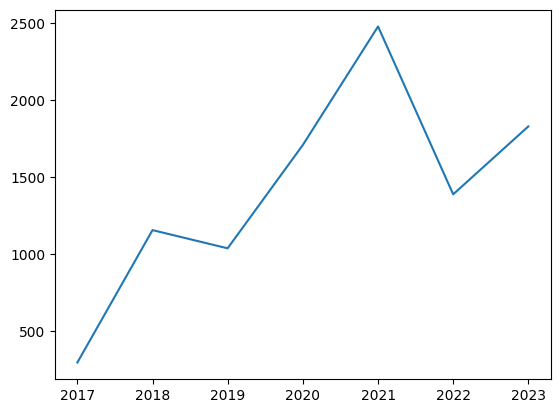

--------------------------
----------- READING: ../review_dataset/Social_Media/tiktok.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 9995
MAX DATE: 2023-11-12 02:03:06
MIN DATE: 2018-05-17 21:23:50
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2018-01-01    427      427    427
2019-01-01   1124     1124   1124
2020-01-01   2852     2852   2852
2021-01-01   1768     1768   1768
2022-01-01   1830     1830   1830
2023-01-01   1994     1994   1994


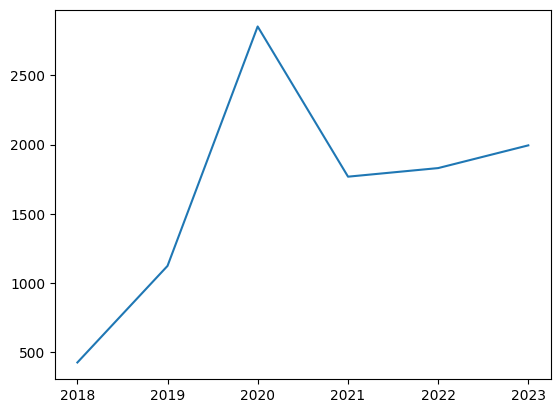

--------------------------
----------- READING: ../review_dataset/Social_Media/whatsapp-messenger.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10040
UNIQUE REVIEWS: 7902
MAX DATE: 2023-11-12 03:02:56
MIN DATE: 2017-09-04 20:57:02
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    380      380    380
2018-01-01   1297     1297   1297
2019-01-01   1281     1281   1281
2020-01-01   1155     1155   1155
2021-01-01   1180     1180   1180
2022-01-01   1097     1097   1097
2023-01-01   1512     1512   1512


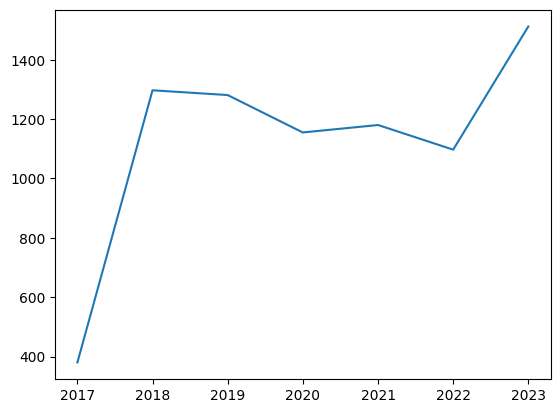

--------------------------


In [288]:
for data_set in set_paths:
    print("----------- READING:", data_set)
    try:
        this_set = pd.read_csv(data_set)
    except:
        print("Failed to read:", data_set)
        continue
    
    this_set = clean_dataset(this_set)
    
    df_year = this_set.copy()
    df_year['Date'] = pd.to_datetime(df_year["Date"].dt.strftime('%Y'))
    df_year = (df_year.groupby(['Date'])).count()
    print(df_year)
    x =  list(df_year.index)
    y = list(df_year['Content'])

    plt.plot(x, y)  # Plot the chart 
    plt.show()  # display 
    print("--------------------------")

#### Exploring current data set only now

In [289]:
df = current_set.copy()
df['Date'] = pd.to_datetime(df["Date"].dt.strftime('%Y'))
df_year_stats = (df.groupby(['Date'])).count()
print(df_year_stats)

            Score  Content  Title
Date                             
2017-01-01    650      650    650
2018-01-01   1272     1272   1272
2019-01-01   1938     1938   1938
2020-01-01   2030     2030   2030
2021-01-01   1517     1517   1517
2022-01-01   1438     1438   1438
2023-01-01   1075     1075   1075


#### Total reviews per year

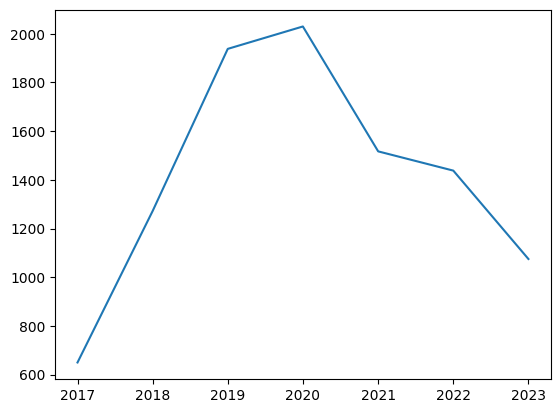

In [290]:

x =  list(df_year_stats.index)
y = list(df_year_stats['Content'])
  
plt.plot(x, y)  # Plot the chart 
plt.show()  # display 

## Keywords trends per year

In [291]:
### MAKE A DICT OF DATA FRAMES, YEAR (DATETIME) -> DATAFRAME OF REVIEWS

df_years = {}
start = df['Date'].min()
end = df['Date'].max()
curr_year = start

while curr_year <= end:
    print(curr_year)
    df_years[curr_year] = df[df['Date'] == curr_year]
    curr_year = curr_year + relativedelta(years=1)


2017-01-01 00:00:00
2018-01-01 00:00:00
2019-01-01 00:00:00
2020-01-01 00:00:00
2021-01-01 00:00:00
2022-01-01 00:00:00
2023-01-01 00:00:00


In [292]:
## get a dict s.t dict[year -> dict[keyword -> count]]
kw_years ={}
for year, df in df_years.items():
    keywords_tuples = getTopKeywords(df['Content'])
    kw_years[year] = OrderedDict((x, y) for x, y in keywords_tuples)
    print(year)
    for kw, count in keywords_tuples:
        if count > 1:
            print(kw, count)
    print()

...Sorting
2017-01-01 00:00:00
game 461
update 140
base 114
love 112
playing 108
clash 98
time 97
years 95
great 92
clans 88
clash of clans 86
builder 86
app 83
play 78
builder base 74
fun 73
troops 59
clan 59
supercell 58
app store 58
upgrade 55
make 55
store 54
good 52
level 50
hall 50
open 50
back 48
great game 47
games 45
town hall 45
played 42
thing 41
love this game 39
long 38
town 38
people 37
problem 37
attack 35
village 33
fix 33
updates 31
things 30
money 29
lot 29
awesome 28
amazing 28
phone 26
work 26
war 25
battle 25
love the game 24
playing this game 24
times 23
screen 23
players 22
account 22
days 22
gems 22
add 22
build 22
click 22
coc 21
iphone 21
day 21
troop 20
building 20
elixir 20
gold 20
guys 20
stars 19
player 19
button 19
favorite 19
making 18
builder hall 18
star 18
made 18
game is great 18
builders 18
friends 18
give 18
bases 17
good game 17
year 16
started 16
recently 16
put 16
walls 15
pay 15
trophies 15
start 15
updated 15
lost 15
loved 14
upgrading 14
opti

...Sorting
2018-01-01 00:00:00
game 871
playing 246
love 224
years 215
time 207
update 181
clan 180
clash 180
play 174
base 170
fun 166
clans 143
clash of clans 141
great 133
town hall 123
games 117
supercell 115
played 114
make 109
back 105
troops 103
hall 103
upgrade 102
app 97
good 93
great game 93
builder 91
love this game 89
level 85
town 85
thing 82
people 80
playing this game 76
long 71
builder base 69
money 67
problem 66
account 63
amazing 63
village 63
add 62
gems 62
attack 61
lot 58
things 55
open 53
app store 52
gold 50
store 50
fix 50
elixir 49
love the game 49
updates 48
days 46
war 44
players 43
friends 43
max 41
work 41
walls 39
phone 39
started 39
clan games 38
long time 38
awesome 38
give 37
coc 37
start 37
guys 36
put 36
year 35
played this game 35
times 34
day 33
favorite 33
wait 33
build 32
fun game 32
strategy 31
lost 31
stuff 31
enjoy 31
upgrades 31
iphone 31
made 31
makes 30
support 30
stars 30
building 30
change 29
cool 29
resources 28
spend 28
higher 27
chat 27

...Sorting
2019-01-01 00:00:00
game 1327
playing 409
love 347
years 338
time 303
clan 266
clash 256
fun 247
play 247
clans 241
clash of clans 220
great 220
base 200
town hall 199
back 189
people 178
make 175
good 169
played 168
supercell 162
upgrade 160
love this game 158
hall 155
thing 154
playing this game 151
games 149
troops 148
town 146
update 142
account 135
great game 135
global 120
level 116
amazing 114
long 110
attack 109
chat 107
lot 106
gold 106
money 104
things 96
global chat 91
players 87
gems 85
builder 85
problem 84
day 79
friends 77
pass 76
add 72
elixir 67
awesome 64
wait 63
builder base 63
days 61
started 61
long time 61
star 60
love the game 60
village 59
phone 59
ago 58
walls 56
updates 56
start 55
gold pass 55
put 55
war 54
lost 54
app 54
good game 54
find 51
coc 51
made 51
feel 50
building 48
builders 47
give 47
recently 47
account back 47
max 47
years ago 47
upgrades 47
change 47
hours 47
fix 47
played this game 46
fun game 46
year 45
trophies 45
pay 45
stars 45


...Sorting
2020-01-01 00:00:00
game 1434
playing 461
love 382
clan 361
years 356
time 308
clans 306
clash 306
play 296
fun 295
great 261
clash of clans 261
global 254
global chat 238
back 235
chat 216
people 215
town hall 213
played 196
upgrade 193
love this game 184
good 181
great game 178
base 171
make 164
hall 160
supercell 157
games 152
account 152
thing 149
troops 148
long 139
town 135
amazing 128
level 126
playing this game 125
lot 115
update 96
problem 95
builder 91
day 86
attack 86
days 85
friends 85
things 85
find 85
players 83
builder base 81
gold 80
mobile 76
favorite 75
money 73
started 71
awesome 71
times 70
made 70
elixir 67
app 66
year 65
played this game 63
stars 63
gems 63
phone 62
coc 62
good game 62
updates 61
lost 61
village 61
put 59
ago 58
add 58
mobile game 57
upgrades 53
start 53
playing clash 53
wait 53
wars 52
long time 52
join 52
pass 52
love the game 52
change 51
fix 51
walls 51
give 50
clan castle 50
guys 50
battle 50
hard 50
spend 48
stuff 47
loot 47
win 4

...Sorting
2021-01-01 00:00:00
game 1063
playing 343
love 266
time 263
years 237
play 232
fun 218
clan 196
clash 192
great 168
clans 163
played 156
clash of clans 155
upgrade 153
back 149
base 141
account 141
games 133
town hall 132
good 130
love this game 121
great game 121
level 117
make 115
long 108
thing 104
people 103
town 100
supercell 99
hall 97
playing this game 95
troops 92
amazing 88
global chat 86
chat 85
builder 77
global 77
lot 76
things 73
days 70
attack 68
update 67
friends 65
love the game 64
day 63
made 62
gems 60
players 60
phone 60
long time 59
times 59
problem 58
money 56
gold 56
good game 54
mobile 52
builder base 52
ago 52
building 52
elixir 49
battle 47
started 46
banned 46
wait 46
app 45
recommend 44
accounts 42
played this game 42
add 42
give 42
stuff 42
year 41
put 40
upgrades 40
village 40
lost 40
playing clash 39
awesome 39
fix 39
updates 38
reason 38
walls 37
mobile game 37
absolutely 37
strategy 37
years ago 36
favorite 36
fun game 36
support 36
builders 3

...Sorting
2022-01-01 00:00:00
game 973
playing 335
years 297
time 259
love 248
clash 194
fun 193
play 181
account 166
clan 160
clash of clans 159
clans 149
back 140
great 138
played 134
upgrade 133
good 131
base 127
supercell 127
town hall 124
long 118
games 110
playing this game 106
hall 100
make 99
town 96
update 96
love this game 93
thing 90
great game 89
things 88
troops 85
days 83
upgrades 75
builder 75
day 74
level 73
people 72
lot 71
amazing 70
money 68
attack 64
chat 59
global chat 57
builder base 56
wait 56
mobile 55
times 54
started 54
love the game 53
playing clash 50
problem 50
support 49
friends 48
coc 47
global 47
lost 47
gems 46
recommend 46
elixir 44
players 44
stuff 44
hours 43
updates 43
accounts 42
good game 42
building 41
long time 41
start 41
app 41
spend 41
year 41
give 41
work 40
played this game 40
village 40
gold 39
add 39
made 38
spent 38
build 38
awesome 37
star 36
banned 36
ago 36
mobile game 35
max 35
fix 34
fun game 34
amazing game 33
phone 33
battle 32
u

...Sorting
2023-01-01 00:00:00
game 710
playing 203
base 199
time 176
love 174
years 166
builder 162
update 148
play 146
builder base 145
clash 133
upgrade 126
fun 124
clash of clans 105
clans 103
great 101
account 101
clan 97
long 88
good 87
town hall 81
played 81
back 75
troops 75
make 74
hall 74
great game 65
love this game 65
thing 63
town 62
supercell 62
days 60
level 58
people 54
upgrades 52
attack 52
things 50
amazing 50
games 49
money 49
playing this game 49
players 45
times 44
lot 44
gems 43
gold 41
wait 40
fix 40
battle 38
village 36
coc 36
made 35
problem 35
support 34
building 33
good game 32
updates 32
love the game 32
change 31
mobile 31
phone 31
long time 30
hard 30
builders 29
makes 29
build 29
ago 28
app 28
stuff 28
started 27
day 27
find 27
guys 27
start 27
months 27
friends 27
add 26
star 26
upgrading 26
give 26
accounts 26
year 25
pay 25
played this game 25
elixir 24
walls 24
work 24
bad 24
fun game 24
hours 23
absolutely 23
cool 23
waiting 23
pass 23
upgrade times 

#### Keywords that remain common

In [293]:
### Make a set from each dict keys
kw_sets = {}
for year, kw_dict in kw_years.items():
    kw_sets[year] = set(kw_dict.keys())


#### We can either construct trajectory for union of all words, OR or the intersection. Trying both:
- UNION

In [297]:
# kw_years has ordered dict with counts against each year
# kw_sets are sets of keywords (keys for kw_years' sub dict) for quick operations
all_keywords = set()
for kw_set in kw_sets.values():
    all_keywords = all_keywords.union(kw_set)

print("TOTAL KEYWORDS =",len(all_keywords))

# dict to store trajectroy for each word count. if word is not found in a year ==> 0
kw_trajectory = {}
for kw in all_keywords:
    for year in kw_years.keys():
        curr_year_count = 0 if kw not in kw_years[year] else kw_years[year][kw]
        if kw in kw_trajectory: # append to list
            kw_trajectory[kw].append(curr_year_count)
        else:
            kw_trajectory[kw] = [curr_year_count]

print("trajectory for money:", kw_trajectory['money'])

TOTAL KEYWORDS = 55974
trajectory for money: [29, 67, 104, 73, 56, 68, 49]


- Intersection -- common words

In [319]:
common_keywords = set()
common_keywords = set.intersection(*(list(kw_sets.values())))

print("TOTAL KEYWORDS =",len(common_keywords))
print(common_keywords)
print("trajectory for hacked:", kw_trajectory['hacked'])

TOTAL KEYWORDS = 928
{'request', 'buying', 'guess', 'amount of trophies', 'ive played', 'perfect', 'builders base', 'full', 'lost my village', 'time', 'updates', 'win game', 'fixed', 'iphone', 'coins', 'huts', 'builder hall', 'single player', 'hard', 'archer tower', 'leveling', 'life', 'builder hall level', 'difficult', 'joke', 'addition', 'free to play', 'stand', 'doubt', 'long term', 'play clash', 'build things', 'make people', 'good game', 'glitches', 'storages', 'game makes', 'dear supercell', 'real money', 'highest', 'lvl', 'installed', 'stuff', 'played the game', 'game supercell', 'normal', 'city', 'storage', 'boost', 'active', 'real', 'buy', 'hero', 'love clash', 'clan games', 'developers', 'star review', 'king', 'actual', 'war', 'phishing', 'defenses', 'place', 'job', 'bigger', 'grinding', 'hall', 'charge', 'bad thing', 'love this game', 'recently', 'dont', 'ideas', 'super fun', 'device', 'couple', 'progression', 'decided', 'clash royale', 'respond', 'entertaining', 'great game

In [ ]:
## No of users? -- Categorical keywords

#### Automate: make the above analysis a function: (App data_set) -> kw_trajectories

In [ ]:
# todo

## Categorical Analysis

The idea is to perform temporal analysis for each year, for each category. The above analysis does this for one data_set only. We expand on it and instead of doing an app by app analysis, we do  category